# **인공신경망모델_분류_1: 이진 분류 문제**

### Jupyter Notebook 단축키
- ctrl+enter: 셀 실행
- shift+enter: 셀 실행 및 다음 셀 이동
- alt+enter: 셀 실행, 다음 셀 이동, 새로운 셀 생성
- a: 상단에 새로운 셀 만들기
- b: 하단에 새로운 셀 만들기
- dd: 셀 삭제(x: 셀 삭제)
- esc: 셀 나가기
- m: 마크다운 셀로 바꾸기
- y: 마크다운 셀을 다시Code로 바꾸기

In [1]:
%%javascript
$('<div id="toc"></div>').css({position: 'fixed', top: '120px', left: 0}).appendTo(document.body);
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js');

<IPython.core.display.Javascript object>

## 1. 모듈 불러오기

In [2]:
''' 기본 모듈 및 시각화 모듈 '''
from IPython.display import display, HTML
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


''' 데이터 전처리 모듈 '''
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

''' Neural Network Classifier 모듈 '''
from sklearn.neural_network import MLPClassifier

''' 결과 평가용 모듈 '''
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

## 2. 분석데이터: Parkinsons (이진 분류 문제)

![alt text](https://archive.ics.uci.edu/ml/assets/MLimages/Large174.jpg "")
<center> <a href='https://archive.ics.uci.edu/ml/datasets/Parkinsons'> https://archive.ics.uci.edu/ml/datasets/Parkinsons </a></center>



### 설명변수 (X)
- name - ASCII subject name and recording number
- MDVP:Fo(Hz) - Average vocal fundamental frequency
- MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
- MDVP:Flo(Hz) - Minimum vocal fundamental frequency
- MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency
- MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
- NHR,HNR - Two measures of ratio of noise to tonal components in the voice
- RPDE,D2 - Two nonlinear dynamical complexity measures
- DFA - Signal fractal scaling exponent
- spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

### 반응변수 (Y)
- status - Health status of the subject (one) - Parkinson's, (zero) - healthy


## 3. 데이터 전처리 및 탐색적 데이터 분석

### 데이터 불러오기

In [3]:
dat = pd.read_csv('./data/Parkinsons.csv', index_col=0)

### 데이터 확인

In [4]:
print('Data shape: {}'.format(dat.shape))
dat.head()

Data shape: (195, 23)


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
name,,,,,,,,,,,,,,,,,,,,,
phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


### 클래스 비율 확인
0: Healthy <br>
1: Parkinson's Disease

In [5]:
dat.groupby('status')['status'].count()

status
0     48
1    147
Name: status, dtype: int64

### 설명변수(X)와 반응변수(Y) 정의

In [6]:
x = dat.drop('status', axis=1)
y = dat['status']

### 학습 데이터(Training Dataset)와 테스트 데이터(Testing Dataset) 분리
- 학습데이터와 검증데이터의 클래스 비율이 달라지지 않도록 stratify 옵션 사용
- 학습데이터와 검증데이터에서 클래스의 비율 확인
- 히스토그램 제목의 숫자가 파킨슨 환자의 비율

In [7]:
train_x, test_x, train_y, test_y = train_test_split(x, y, stratify=y, test_size=0.3)

Text(0.5, 1.0, 'Testing Data (0.746)')

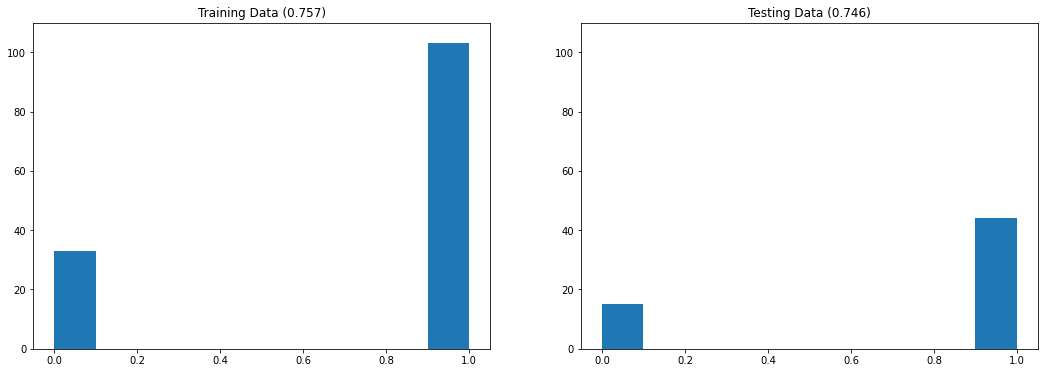

In [8]:
plt.figure(figsize=(18, 6))

plt.subplot(121)
plt.hist(train_y)
plt.ylim(0, 110)
plt.title('Training Data ({:.3f})'.format(np.mean(train_y)))

plt.subplot(122)
plt.hist(test_y)
plt.ylim(0, 110)
plt.title('Testing Data ({:.3f})'.format(np.mean(test_y)))

### 정규화 (Normalization) : Standard Scaler
- 설명변수(X) 내 변수별 평균이 0, 표준편차가 1이 되도록 변환
- Training Data를 기준으로 Scaler를 구성한 뒤, Testing Data에 Scaler를 적용

In [9]:
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

## 4. 모델링: Multilayer Perceptron (MLP) Classifier

<a href='http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html'> Scikit-Learn MLP Classifier Manual </a>

### MLP Classifier 정의
- activation: activation function 타입 (identity, logistic, tanh, relu)
- alpha: L2 regularization term parameter (과적합 방지용)
- batch_size: stochastic optimizer가 사용할 minibatch 크기
- max_iter: stochastic optimizer의 최대 iteration 횟수
- solver: stochastic optimizer 종류 (adam, sgd, lbfgs)

In [10]:
clf_mlp = MLPClassifier(activation='relu', alpha=1E-4, batch_size=10,
                        hidden_layer_sizes=(10), max_iter=500,
                        solver='adam', verbose=10)

### MLP Classifier 구조
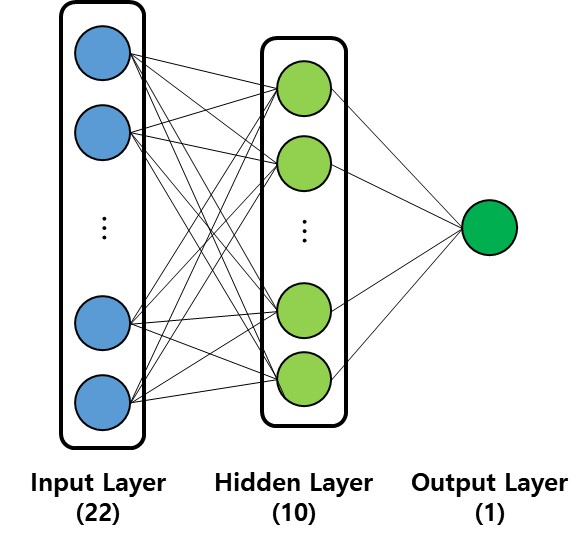

### MLP Classifier 학습

In [11]:
clf_mlp.fit(train_x, train_y)

Iteration 1, loss = 1.01875037
Iteration 2, loss = 0.90424548
Iteration 3, loss = 0.82147402
Iteration 4, loss = 0.74965400
Iteration 5, loss = 0.69147495
Iteration 6, loss = 0.63550831
Iteration 7, loss = 0.59374010
Iteration 8, loss = 0.55643127
Iteration 9, loss = 0.52174032
Iteration 10, loss = 0.49488757
Iteration 11, loss = 0.47146345
Iteration 12, loss = 0.45410891
Iteration 13, loss = 0.43709540
Iteration 14, loss = 0.42149068
Iteration 15, loss = 0.40816854
Iteration 16, loss = 0.39603289
Iteration 17, loss = 0.38391585
Iteration 18, loss = 0.37361508
Iteration 19, loss = 0.36315576
Iteration 20, loss = 0.35431663
Iteration 21, loss = 0.34514049
Iteration 22, loss = 0.33718996
Iteration 23, loss = 0.32891201
Iteration 24, loss = 0.32157901
Iteration 25, loss = 0.31467780
Iteration 26, loss = 0.30874273
Iteration 27, loss = 0.30285657
Iteration 28, loss = 0.29634110
Iteration 29, loss = 0.29162593
Iteration 30, loss = 0.28728295
Iteration 31, loss = 0.28227695
Iteration 32, los

C:\Users\seok\.conda\envs\hynix\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(batch_size=10, hidden_layer_sizes=10, max_iter=500, verbose=10)

## 5. Multilayer Perceptron 모델 성능 평가

### 학습된 MLP Classifier 결과 확인: Training Data Confusion Matrix

In [12]:
train_y_pred = clf_mlp.predict(train_x)

In [13]:
cm_train = confusion_matrix(train_y, train_y_pred)
cm_train = pd.DataFrame(cm_train, columns=['Healthy', 'Parkinsons'], index=['Healthy', 'Parkinsons'])

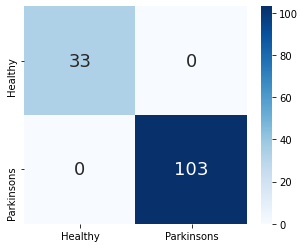

In [14]:
plt.figure(figsize=(5, 4))
sns.heatmap(data=cm_train, annot=True, fmt='d', annot_kws={'size': 18}, cmap='Blues')

### 학습된 MLP Classifier 결과 확인: Training Data Class Probability Box Plot

C:\Users\seok\.conda\envs\hynix\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


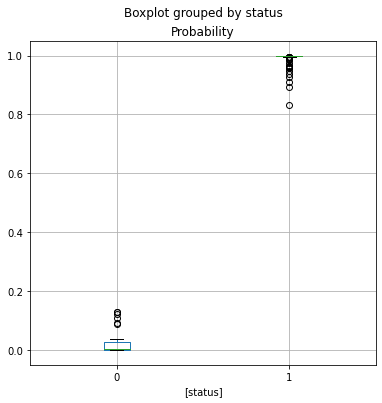

In [15]:
train_y_prob = clf_mlp.predict_proba(train_x)[:,1]
train_results = pd.DataFrame(train_y)
train_results.insert(1, column='Probability', value=train_y_prob)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)
train_results.boxplot(by='status', ax=ax)

### 학습된 MLP Classifier 성능 평가: Testing Data Confusion Matrix

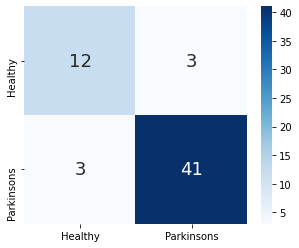

In [16]:
test_y_pred = clf_mlp.predict(test_x)
cm_test = confusion_matrix(test_y, test_y_pred)
cm_test = pd.DataFrame(cm_test, columns=['Healthy', 'Parkinsons'], index=['Healthy', 'Parkinsons'])
plt.figure(figsize=(5, 4))
sns.heatmap(data=cm_test, annot=True, fmt='d', annot_kws={'size': 18}, cmap='Blues')

### 학습된 MLP Classifier 성능 평가: Testing Data Class Probability Box Plot

In [17]:
train_results

,status,Probability
name,,
phon_R01_S17_6,0,1.565543e-05
phon_R01_S06_1,1,9.938789e-01
phon_R01_S02_3,1,1.000000e+00
phon_R01_S18_4,1,9.999999e-01
phon_R01_S17_3,0,7.818212e-03
...,...,...
phon_R01_S34_5,1,9.894117e-01
phon_R01_S04_3,1,9.882854e-01
phon_R01_S27_7,1,9.999997e-01


C:\Users\seok\.conda\envs\hynix\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


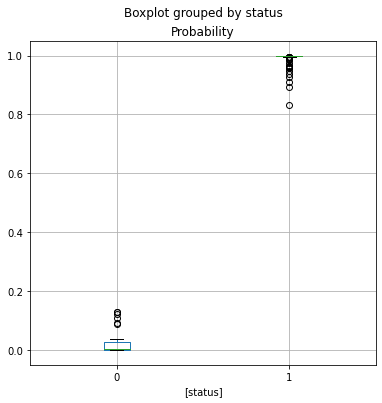

In [18]:
test_y_prob = clf_mlp.predict_proba(test_x)[:,1]
test_results = pd.DataFrame(test_y)
test_results.insert(1, column='Probability', value=test_y_prob)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)
train_results.boxplot(by='status', ax=ax)

### 학습된 MLP Classifier 성능 평가: 다양한 평가 지표
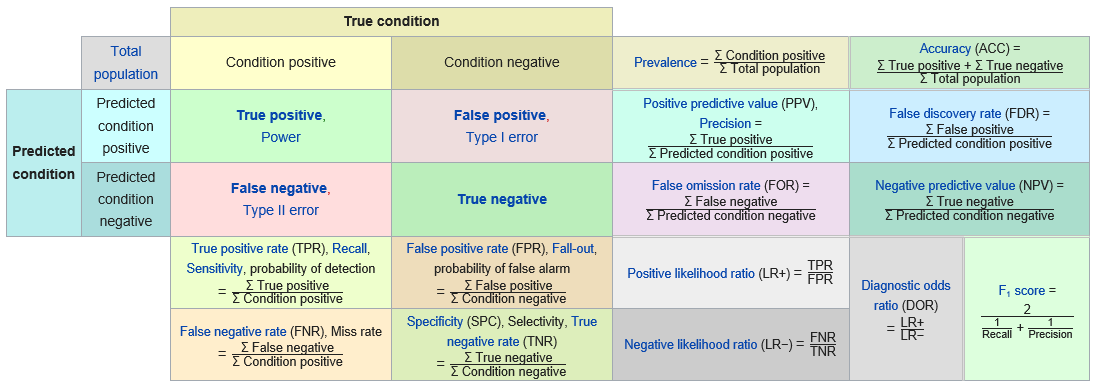

- Parkinsons 문제에서는 Positive (Parkinson's Disease) = 1, Negative (Healthy) = 0임에 주의
- 다양한 분류 평가 지표를 계산하기 위한 함수 정의

In [19]:
def validation_measure(cm):
    TN, FP, FN, TP = cm.flatten()
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    precision = TP/(TP+FP)
    F1_score = 2/(1/sensitivity + 1/precision)
    return accuracy, sensitivity, specificity, precision, F1_score

### Training Result Summary

In [20]:
train_cm = confusion_matrix(train_y, train_y_pred)
train_acc, train_sens, train_spec, train_prec, train_f1 = validation_measure(train_cm)
print('Train Confusion Matrix')
print(train_cm)
print('Train Accuracy   : {:.3f}'.format(train_acc))
print('Train Sensitivity: {:.3f}'.format(train_sens))
print('Train Specificity: {:.3f}'.format(train_spec))
print('Train Precision  : {:.3f}'.format(train_prec))
print('Train F1 Score   : {:.3f}'.format(train_f1))

Train Confusion Matrix
[[ 33   0]
 [  0 103]]
Train Accuracy   : 1.000
Train Sensitivity: 1.000
Train Specificity: 1.000
Train Precision  : 1.000
Train F1 Score   : 1.000


### Testing Result Summary

In [21]:
test_cm = confusion_matrix(test_y, test_y_pred)
test_acc, test_sens, test_spec, test_prec, test_f1 = validation_measure(test_cm)
print('Test Confusion Matrix')
print(test_cm)
print('Test Accuracy   : {:.3f}'.format(test_acc))
print('Test Sensitivity: {:.3f}'.format(test_sens))
print('Test Specificity: {:.3f}'.format(test_spec))
print('Test Precision  : {:.3f}'.format(test_prec))
print('Test F1 Score   : {:.3f}'.format(test_f1))
parameter_size = [coef.shape for coef in clf_mlp.coefs_]
print('Parameter Size  :',parameter_size)

Test Confusion Matrix
[[12  3]
 [ 3 41]]
Test Accuracy   : 0.898
Test Sensitivity: 0.932
Test Specificity: 0.800
Test Precision  : 0.932
Test F1 Score   : 0.932
Parameter Size  : [(22, 10), (10, 1)]


## 6. 추가 분석 (실습)

### Hidden Layer의 Node 개수를 줄이면 성능이 어떻게 변화할까?
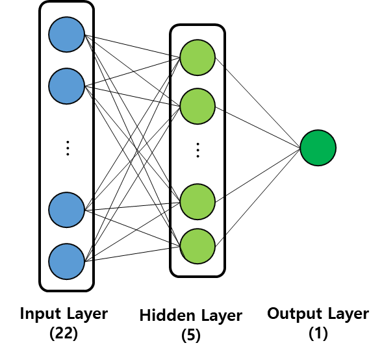

In [22]:
clf_mlp2 = MLPClassifier(activation='relu', alpha=1E-4, batch_size=10,
                        hidden_layer_sizes=(5), max_iter=500,
                        solver='adam', verbose=10)


In [23]:
clf_mlp2.fit(train_x, train_y)

Iteration 1, loss = 0.87820359
Iteration 2, loss = 0.82939317
Iteration 3, loss = 0.78688391
Iteration 4, loss = 0.74965783
Iteration 5, loss = 0.71452180
Iteration 6, loss = 0.68229481
Iteration 7, loss = 0.65192440
Iteration 8, loss = 0.62506382
Iteration 9, loss = 0.59811198
Iteration 10, loss = 0.57599348
Iteration 11, loss = 0.55371682
Iteration 12, loss = 0.53252982
Iteration 13, loss = 0.51232124
Iteration 14, loss = 0.49718882
Iteration 15, loss = 0.48231773
Iteration 16, loss = 0.46875649
Iteration 17, loss = 0.45647126
Iteration 18, loss = 0.44376030
Iteration 19, loss = 0.43290017
Iteration 20, loss = 0.42188538
Iteration 21, loss = 0.41188433
Iteration 22, loss = 0.40303228
Iteration 23, loss = 0.39449810
Iteration 24, loss = 0.38656272
Iteration 25, loss = 0.37820540
Iteration 26, loss = 0.37121416
Iteration 27, loss = 0.36436410
Iteration 28, loss = 0.35831897
Iteration 29, loss = 0.35272818
Iteration 30, loss = 0.34707476
Iteration 31, loss = 0.34231640
Iteration 32, los

C:\Users\seok\.conda\envs\hynix\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(batch_size=10, hidden_layer_sizes=5, max_iter=500, verbose=10)

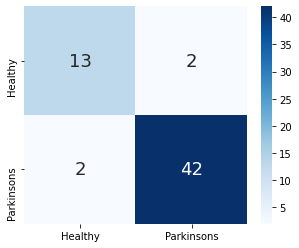

In [24]:
train_y_pred2 = clf_mlp2.predict(train_x)
test_y_pred2 = clf_mlp2.predict(test_x)
cm_test2 = confusion_matrix(test_y, test_y_pred2)
cm_test2 = pd.DataFrame(cm_test2, columns=['Healthy', 'Parkinsons'], index=['Healthy', 'Parkinsons'])
plt.figure(figsize=(5, 4))
sns.heatmap(data=cm_test2, annot=True, fmt='d', annot_kws={'size': 18}, cmap='Blues')

### Training Result Summary

In [25]:
train_cm = confusion_matrix(train_y, train_y_pred2)
train_acc, train_sens, train_spec, train_prec, train_f1 = validation_measure(train_cm)
print('Train Confusion Matrix')
print(train_cm)
print('Train Accuracy   : {:.3f}'.format(train_acc))
print('Train Sensitivity: {:.3f}'.format(train_sens))
print('Train Specificity: {:.3f}'.format(train_spec))
print('Train Precision  : {:.3f}'.format(train_prec))
print('Train F1 Score   : {:.3f}'.format(train_f1))

Train Confusion Matrix
[[ 33   0]
 [  0 103]]
Train Accuracy   : 1.000
Train Sensitivity: 1.000
Train Specificity: 1.000
Train Precision  : 1.000
Train F1 Score   : 1.000


### Testing Result Summary

In [26]:
test_cm2 = confusion_matrix(test_y, test_y_pred2)
test_acc, test_sens, test_spec, test_prec, test_f1 = validation_measure(test_cm2)
print('Test Confusion Matrix')
print(test_cm)
print('Test Accuracy   : {:.3f}'.format(test_acc))
print('Test Sensitivity: {:.3f}'.format(test_sens))
print('Test Specificity: {:.3f}'.format(test_spec))
print('Test Precision  : {:.3f}'.format(test_prec))
print('Test F1 Score   : {:.3f}'.format(test_f1))
parameter_size = [coef.shape for coef in clf_mlp2.coefs_]
print('Parameter Size  :',parameter_size)

Test Confusion Matrix
[[12  3]
 [ 3 41]]
Test Accuracy   : 0.932
Test Sensitivity: 0.955
Test Specificity: 0.867
Test Precision  : 0.955
Test F1 Score   : 0.955
Parameter Size  : [(22, 5), (5, 1)]


### Hidden Layer의 Node 개수를 늘리면 성능이 어떻게 변화할까?
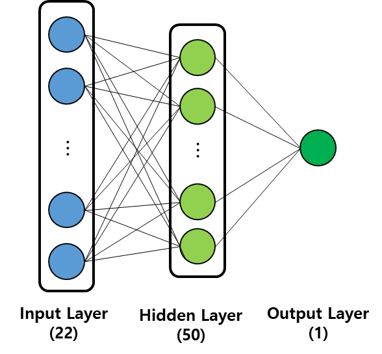

In [27]:
clf_mlp = MLPClassifier(activation='relu', alpha=1E-4, batch_size=10,
                        hidden_layer_sizes=(50), max_iter=500,
                        solver='adam', verbose=10)


In [28]:
clf_mlp.fit(train_x, train_y)

Iteration 1, loss = 0.79368897
Iteration 2, loss = 0.61217161
Iteration 3, loss = 0.50838270
Iteration 4, loss = 0.45095596
Iteration 5, loss = 0.41550776
Iteration 6, loss = 0.39008708
Iteration 7, loss = 0.37123390
Iteration 8, loss = 0.35482693
Iteration 9, loss = 0.34174988
Iteration 10, loss = 0.33010178
Iteration 11, loss = 0.31968111
Iteration 12, loss = 0.31061465
Iteration 13, loss = 0.30171394
Iteration 14, loss = 0.29443077
Iteration 15, loss = 0.28728289
Iteration 16, loss = 0.28023022
Iteration 17, loss = 0.27511910
Iteration 18, loss = 0.26807074
Iteration 19, loss = 0.26260424
Iteration 20, loss = 0.25766065
Iteration 21, loss = 0.25193610
Iteration 22, loss = 0.24738052
Iteration 23, loss = 0.24215965
Iteration 24, loss = 0.23781716
Iteration 25, loss = 0.23289285
Iteration 26, loss = 0.22847035
Iteration 27, loss = 0.22410783
Iteration 28, loss = 0.22063502
Iteration 29, loss = 0.21577878
Iteration 30, loss = 0.21258201
Iteration 31, loss = 0.20726309
Iteration 32, los

MLPClassifier(batch_size=10, hidden_layer_sizes=50, max_iter=500, verbose=10)

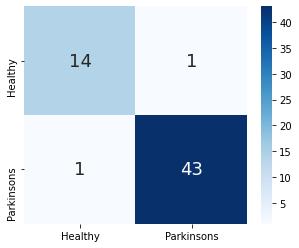

In [29]:
train_y_pred = clf_mlp.predict(train_x)
test_y_pred = clf_mlp.predict(test_x)
cm_test = confusion_matrix(test_y, test_y_pred)
cm_test = pd.DataFrame(cm_test, columns=['Healthy', 'Parkinsons'], index=['Healthy', 'Parkinsons'])
plt.figure(figsize=(5, 4))
sns.heatmap(data=cm_test, annot=True, fmt='d', annot_kws={'size': 18}, cmap='Blues')

### Training Result Summary

In [30]:
train_cm = confusion_matrix(train_y, train_y_pred)
train_acc, train_sens, train_spec, train_prec, train_f1 = validation_measure(train_cm)
print('Train Confusion Matrix')
print(train_cm)
print('Train Accuracy   : {:.3f}'.format(train_acc))
print('Train Sensitivity: {:.3f}'.format(train_sens))
print('Train Specificity: {:.3f}'.format(train_spec))
print('Train Precision  : {:.3f}'.format(train_prec))
print('Train F1 Score   : {:.3f}'.format(train_f1))

Train Confusion Matrix
[[ 33   0]
 [  0 103]]
Train Accuracy   : 1.000
Train Sensitivity: 1.000
Train Specificity: 1.000
Train Precision  : 1.000
Train F1 Score   : 1.000


### Testing Result Summary

In [31]:
test_cm = confusion_matrix(test_y, test_y_pred)
test_acc, test_sens, test_spec, test_prec, test_f1 = validation_measure(test_cm)
print('Test Confusion Matrix')
print(test_cm)
print('Test Accuracy   : {:.3f}'.format(test_acc))
print('Test Sensitivity: {:.3f}'.format(test_sens))
print('Test Specificity: {:.3f}'.format(test_spec))
print('Test Precision  : {:.3f}'.format(test_prec))
print('Test F1 Score   : {:.3f}'.format(test_f1))
parameter_size = [coef.shape for coef in clf_mlp.coefs_]
print('Parameter Size  :',parameter_size)

Test Confusion Matrix
[[14  1]
 [ 1 43]]
Test Accuracy   : 0.966
Test Sensitivity: 0.977
Test Specificity: 0.933
Test Precision  : 0.977
Test F1 Score   : 0.977
Parameter Size  : [(22, 50), (50, 1)]


### Hidden Layer의 수를 늘리면 성능이 어떻게 변화할까?
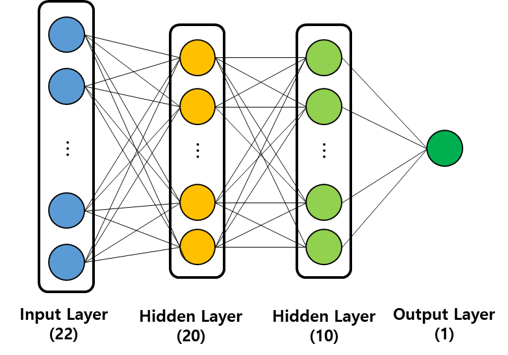

In [32]:
clf_mlp = MLPClassifier(activation='relu', alpha=1E-4, batch_size=10,
                        hidden_layer_sizes=(20,10), max_iter=500,
                        solver='adam', verbose=10)


In [33]:
clf_mlp.fit(train_x, train_y)

Iteration 1, loss = 0.65935923
Iteration 2, loss = 0.59965152
Iteration 3, loss = 0.55836443
Iteration 4, loss = 0.52484012
Iteration 5, loss = 0.49584403
Iteration 6, loss = 0.47153305
Iteration 7, loss = 0.44837139
Iteration 8, loss = 0.42610402
Iteration 9, loss = 0.40659084
Iteration 10, loss = 0.38695445
Iteration 11, loss = 0.36765713
Iteration 12, loss = 0.35019689
Iteration 13, loss = 0.33389868
Iteration 14, loss = 0.31662620
Iteration 15, loss = 0.30457213
Iteration 16, loss = 0.29173263
Iteration 17, loss = 0.27948672
Iteration 18, loss = 0.26973988
Iteration 19, loss = 0.26011421
Iteration 20, loss = 0.25232630
Iteration 21, loss = 0.24290786
Iteration 22, loss = 0.23689039
Iteration 23, loss = 0.23095162
Iteration 24, loss = 0.22317430
Iteration 25, loss = 0.21785796
Iteration 26, loss = 0.21287890
Iteration 27, loss = 0.20875138
Iteration 28, loss = 0.20200003
Iteration 29, loss = 0.19855661
Iteration 30, loss = 0.19282187
Iteration 31, loss = 0.18834369
Iteration 32, los

MLPClassifier(batch_size=10, hidden_layer_sizes=(20, 10), max_iter=500,
              verbose=10)

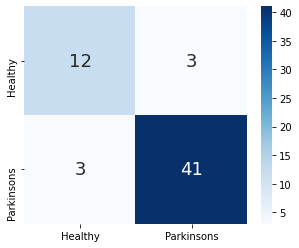

In [34]:
train_y_pred = clf_mlp.predict(train_x)
test_y_pred = clf_mlp.predict(test_x)
cm_test = confusion_matrix(test_y, test_y_pred)
cm_test = pd.DataFrame(cm_test, columns=['Healthy', 'Parkinsons'], index=['Healthy', 'Parkinsons'])
plt.figure(figsize=(5, 4))
sns.heatmap(data=cm_test, annot=True, fmt='d', annot_kws={'size': 18}, cmap='Blues')

### Training Result Summary

In [35]:
train_cm = confusion_matrix(train_y, train_y_pred)
train_acc, train_sens, train_spec, train_prec, train_f1 = validation_measure(train_cm)
print('Train Confusion Matrix')
print(train_cm)
print('Train Accuracy   : {:.3f}'.format(train_acc))
print('Train Sensitivity: {:.3f}'.format(train_sens))
print('Train Specificity: {:.3f}'.format(train_spec))
print('Train Precision  : {:.3f}'.format(train_prec))
print('Train F1 Score   : {:.3f}'.format(train_f1))

Train Confusion Matrix
[[ 33   0]
 [  0 103]]
Train Accuracy   : 1.000
Train Sensitivity: 1.000
Train Specificity: 1.000
Train Precision  : 1.000
Train F1 Score   : 1.000


### Testing Result Summary

In [36]:
test_cm = confusion_matrix(test_y, test_y_pred)
test_acc, test_sens, test_spec, test_prec, test_f1 = validation_measure(test_cm)
print('Test Confusion Matrix')
print(test_cm)
print('Test Accuracy   : {:.3f}'.format(test_acc))
print('Test Sensitivity: {:.3f}'.format(test_sens))
print('Test Specificity: {:.3f}'.format(test_spec))
print('Test Precision  : {:.3f}'.format(test_prec))
print('Test F1 Score   : {:.3f}'.format(test_f1))

parameter_size = [coef.shape for coef in clf_mlp.coefs_]
print('Parameter Size  :',parameter_size)

Test Confusion Matrix
[[12  3]
 [ 3 41]]
Test Accuracy   : 0.898
Test Sensitivity: 0.932
Test Specificity: 0.800
Test Precision  : 0.932
Test F1 Score   : 0.932
Parameter Size  : [(22, 20), (20, 10), (10, 1)]


# **인공신경망모델_분류_2: 다범주 분류 문제**

## 1. 모듈 불러오기

In [37]:
''' 기본 모듈 및 시각화 모듈 '''
from IPython.display import display, HTML
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


''' 데이터 전처리 모듈 '''
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

''' Neural Network Classifier 모듈 '''
from sklearn.neural_network import MLPClassifier

''' 결과 평가용 모듈 '''
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

## 2. 분석데이터: Wine Type  (다범주 분류 문제)

### 설명변수 (X)
- Alcohol
- Malic acid
- Ash
- Alcalinity of ash
- Magnesium
- Total phenols
- Flavanoids
- Nonflavanoid phenols
- Proanthocyanins
- Color intensity
- Hue
- OD280/OD315 of diluted wines
- Proline

### 반응변수 (Y)
- Wine Type

### 데이터 불러오기

In [38]:
dat = pd.read_csv('./data/Wine.csv')
dat.head()

,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315,Proline,Wine Type
0,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
1,14.10,2.16,2.30,18.0,105,2.95,3.32,0.22,2.38,5.75,1.25,3.17,1510,1
2,14.12,1.48,2.32,16.8,95,2.20,2.43,0.26,1.57,5.00,1.17,2.82,1280,1
3,14.75,1.73,2.39,11.4,91,3.10,3.69,0.43,2.81,5.40,1.25,2.73,1150,1
4,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830,1


In [39]:
dat.shape

(178, 14)

## 3. 데이터 전처리 및 탐색적 데이터 분석

### 범주별 데이터 분포 확인

<Figure size 576x576 with 0 Axes>

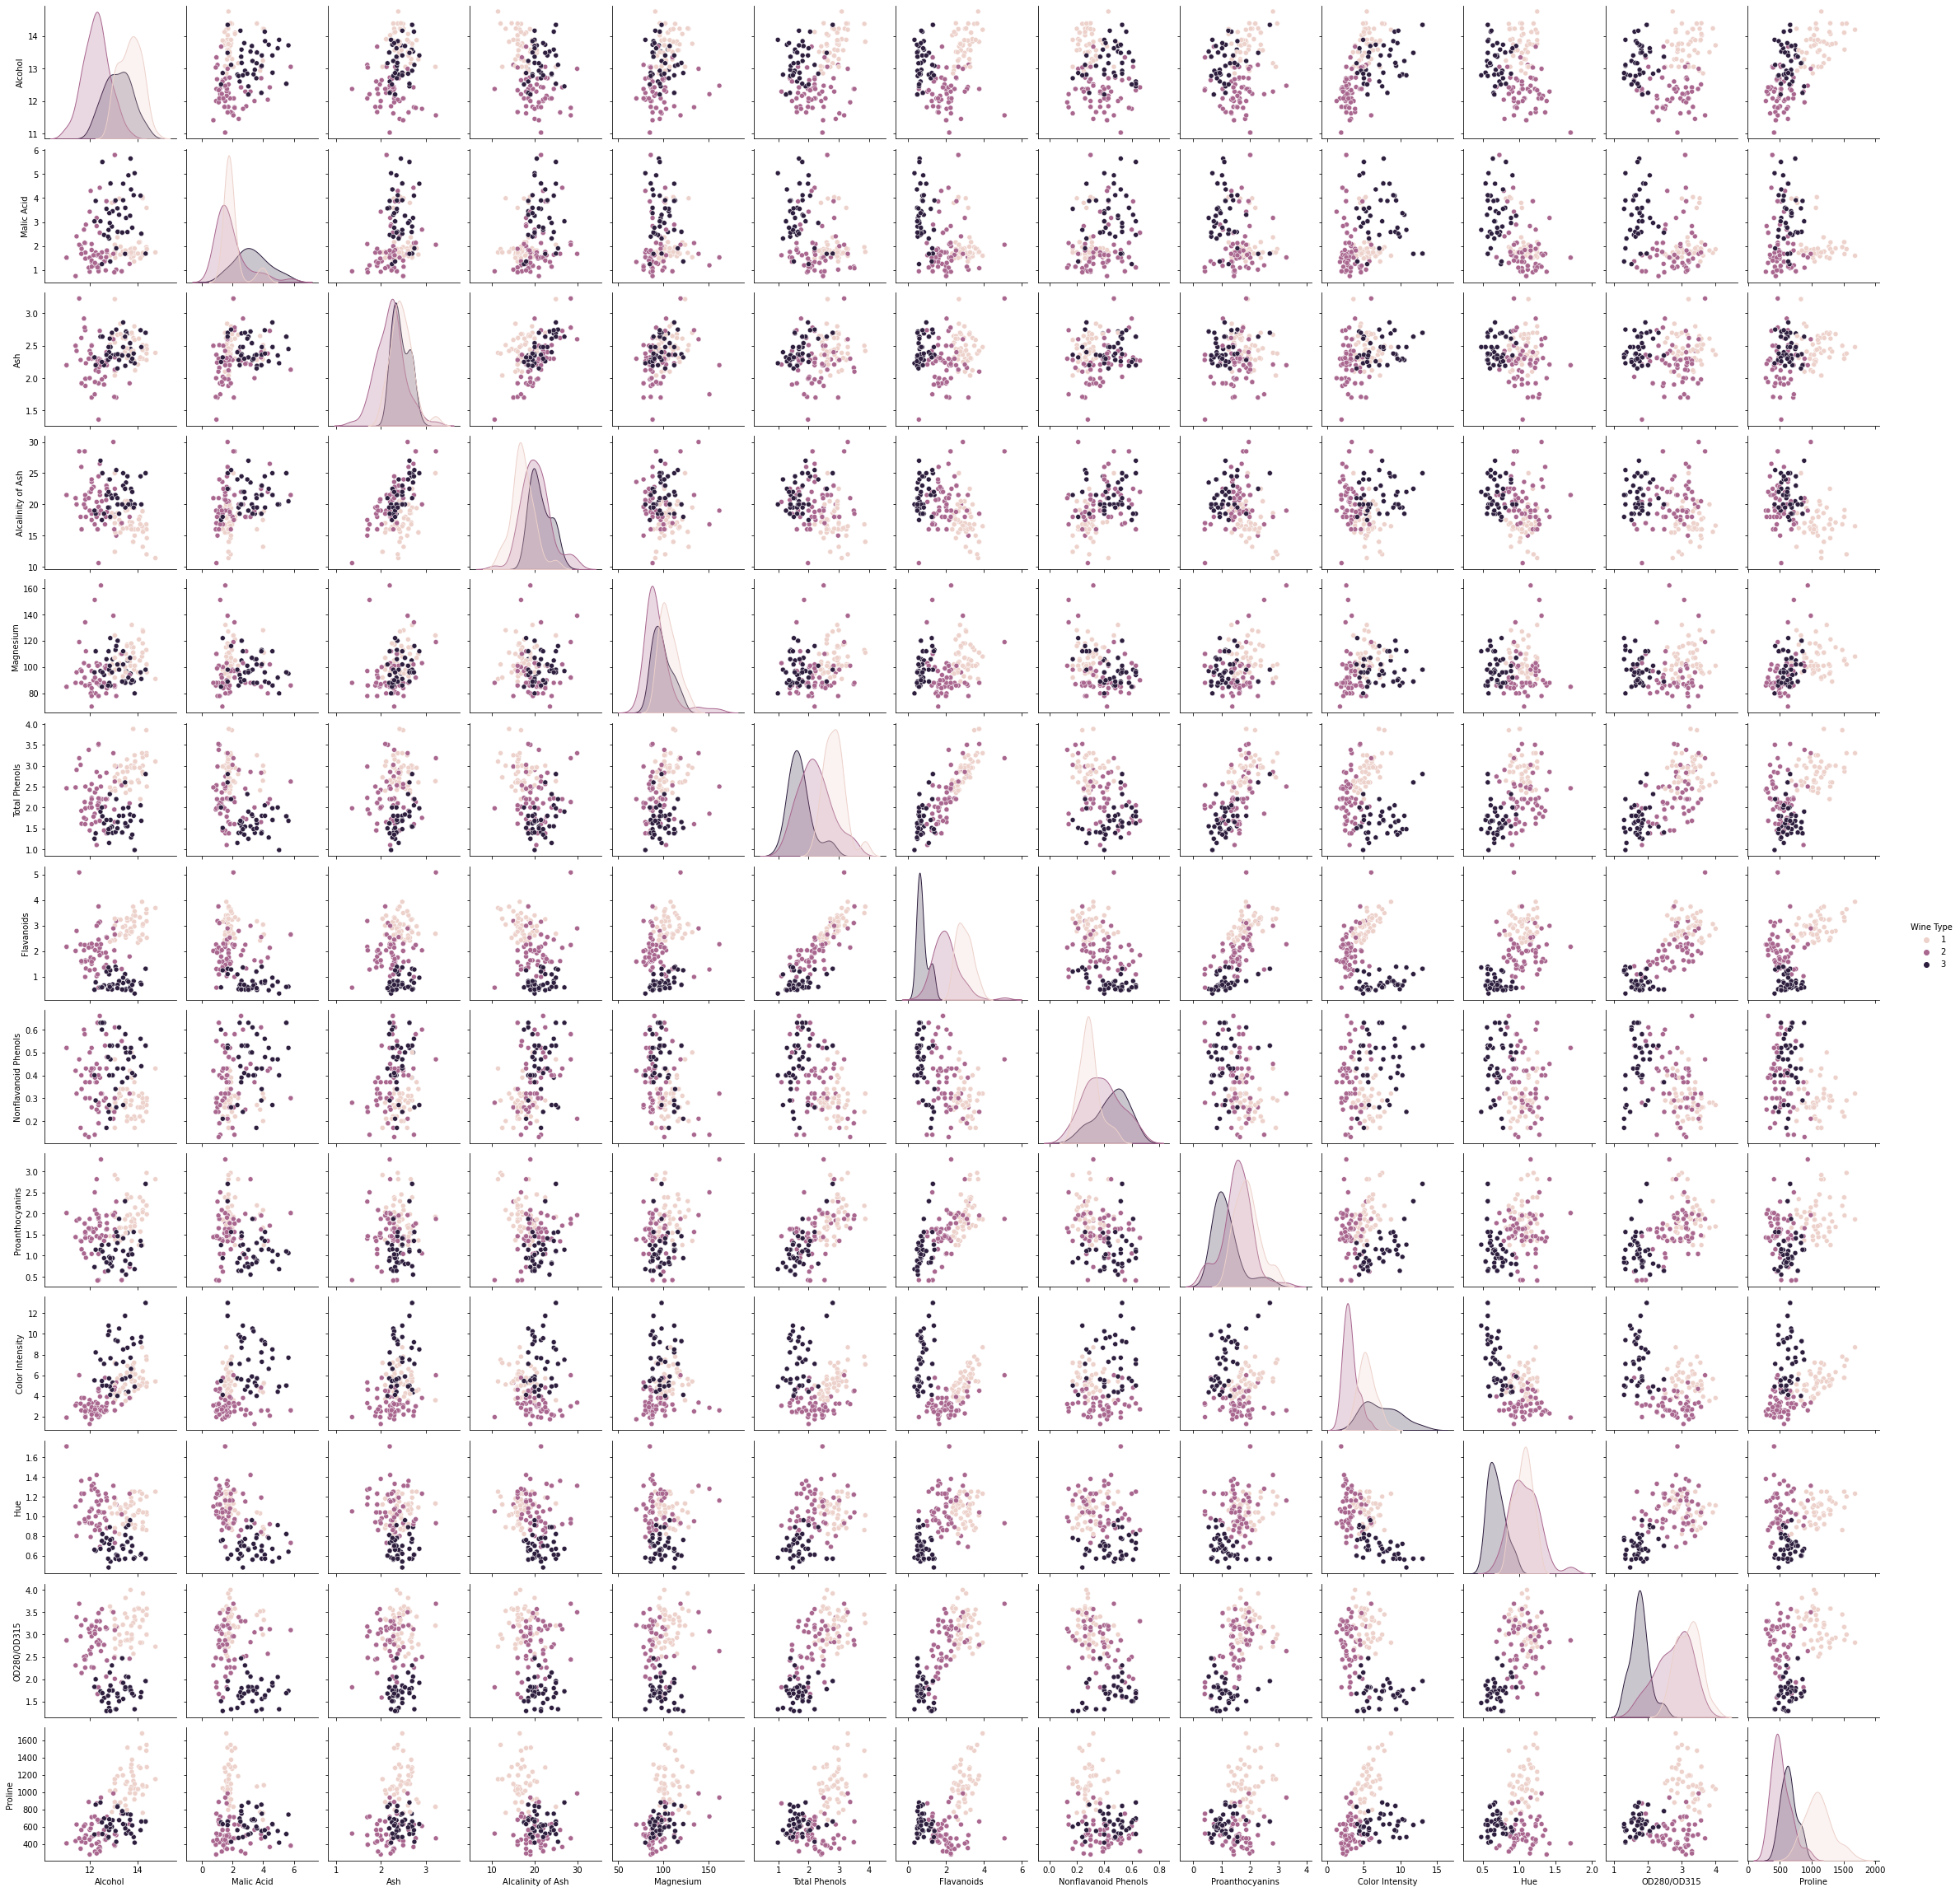

In [40]:
# plt.figure(figsize=(8,8))
# sns.pairplot(dat, hue="Wine Type")
# plt.show()

### 반응변수(Y) 비율 확인

In [46]:
display(dat['Wine Type'].value_counts())

2    71
1    59
3    48
Name: Wine Type, dtype: int64

### 학습데이터 및 테스트데이터 나누기

In [47]:
train_dat, test_dat = train_test_split(dat, test_size=0.3, random_state=55, stratify=dat['Wine Type'])
print('Training')
display(train_dat['Wine Type'].value_counts())
print('Testing')
display(test_dat['Wine Type'].value_counts())

Training


2    50
1    41
3    33
Name: Wine Type, dtype: int64

Testing


2    21
1    18
3    15
Name: Wine Type, dtype: int64

In [48]:
train_x, train_y = train_dat.drop(['Wine Type'], axis=1), train_dat['Wine Type']
test_x,  test_y = test_dat.drop(['Wine Type'], axis=1), test_dat['Wine Type']

## 4. 모델링: Multilayer Perceptron (MLP) Classifier

<a href='http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html'> Scikit-Learn MLP Classifier Manual </a>

### MLP Classifier 정의
- activation: activation function 타입 (identity, logistic, tanh, relu)
- alpha: L2 regularization term parameter (과적합 방지용)
- batch_size: stochastic optimizer가 사용할 minibatch 크기
- max_iter: stochastic optimizer의 최대 iteration 횟수
- solver: stochastic optimizer 종류 (adam, sgd, lbfgs)

In [49]:
clf_mlp = MLPClassifier(activation='relu', alpha=1E-4, batch_size=100,
                        hidden_layer_sizes=(100), max_iter=500,
                        solver='adam', verbose=10)

In [50]:
clf_mlp.fit(train_x, train_y)

Iteration 1, loss = 6.87037026
Iteration 2, loss = 4.62593624
Iteration 3, loss = 4.33438121
Iteration 4, loss = 2.63665608
Iteration 5, loss = 4.47475581
Iteration 6, loss = 2.34675192
Iteration 7, loss = 2.47994692
Iteration 8, loss = 2.34585971
Iteration 9, loss = 1.76954966
Iteration 10, loss = 2.03007538
Iteration 11, loss = 1.80209052
Iteration 12, loss = 1.44451873
Iteration 13, loss = 1.75900839
Iteration 14, loss = 1.50273165
Iteration 15, loss = 1.39834455
Iteration 16, loss = 1.49768536
Iteration 17, loss = 1.31128151
Iteration 18, loss = 1.11392982
Iteration 19, loss = 1.33681673
Iteration 20, loss = 1.09029097
Iteration 21, loss = 1.20969282
Iteration 22, loss = 0.98695675
Iteration 23, loss = 1.05045822
Iteration 24, loss = 0.91915940
Iteration 25, loss = 0.90501660
Iteration 26, loss = 0.93637260
Iteration 27, loss = 0.80228836
Iteration 28, loss = 0.78942229
Iteration 29, loss = 0.88555764
Iteration 30, loss = 0.80547595
Iteration 31, loss = 0.71605901
Iteration 32, los

MLPClassifier(batch_size=100, hidden_layer_sizes=100, max_iter=500, verbose=10)

## 4. 성능평가

In [51]:
train_y_pred = clf_mlp.predict(train_x)
test_y_pred = clf_mlp.predict(test_x)

In [52]:
train_y_pred

array([1, 3, 2, 3, 1, 1, 2, 2, 2, 3, 3, 3, 2, 2, 3, 1, 3, 3, 1, 2, 3, 3,
       3, 3, 2, 3, 2, 2, 1, 3, 1, 3, 2, 2, 2, 2, 2, 2, 1, 3, 2, 1, 2, 2,
       3, 1, 3, 1, 3, 1, 3, 3, 2, 1, 3, 3, 2, 1, 1, 3, 3, 2, 2, 3, 1, 1,
       2, 1, 3, 1, 2, 2, 1, 2, 2, 2, 3, 2, 1, 3, 1, 1, 3, 2, 3, 3, 2, 1,
       1, 3, 3, 3, 1, 3, 2, 3, 1, 2, 2, 3, 3, 1, 1, 1, 2, 1, 3, 3, 2, 3,
       1, 2, 2, 3, 3, 3, 1, 2, 3, 2, 1, 1, 1, 3], dtype=int64)

### Training 데이터 성능평가

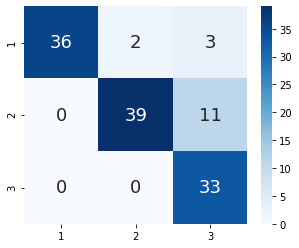

In [53]:
cm_train = confusion_matrix(train_y, train_y_pred)
cm_train = pd.DataFrame(cm_train, columns=['1', '2', '3'], index=['1', '2', '3'])
plt.figure(figsize=(5, 4))
sns.heatmap(data=cm_train, annot=True, fmt='d', annot_kws={'size': 18}, cmap='Blues')

### Testing 데이터 성능평가

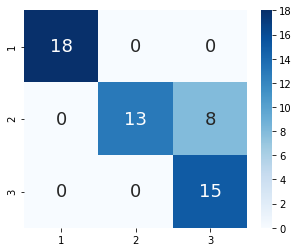

In [54]:
cm_test = confusion_matrix(test_y, test_y_pred)
cm_test = pd.DataFrame(cm_test, columns=['1', '2', '3'], index=['1', '2', '3'])
plt.figure(figsize=(5, 4))
sns.heatmap(data=cm_test, annot=True, fmt='d', annot_kws={'size': 18}, cmap='Blues')

### Training 데이터 예측확률 확인

In [55]:
train_y_pred_proba = clf_mlp.predict_proba(train_x)
train_y_pred_proba = pd.DataFrame(train_y_pred_proba)
train_y_pred_proba.index = train_y.index.copy()

In [56]:
train_results = pd.concat([train_y_pred_proba, train_y], axis=1)
train_results.columns = ['Class Probability 1', 'Class Probability 2', 'Class Probability 3', 'Wine Type']
display(train_results)

,Class Probability 1,Class Probability 2,Class Probability 3,Wine Type
66,0.999992,3.909458e-12,0.000008,1
152,0.026597,1.890320e-03,0.971513,3
117,0.029605,5.502070e-01,0.420188,2
49,0.005247,4.214156e-02,0.952612,3
54,0.580262,6.107883e-02,0.358659,1
...,...,...,...,...
28,0.002566,8.807319e-01,0.116702,2
69,0.940704,6.417684e-04,0.058654,1
89,0.988695,6.075589e-06,0.011299,1
14,0.998755,1.441849e-07,0.001245,1


### Testing 데이터 예측확률 확인

In [57]:
test_y_pred_proba = clf_mlp.predict_proba(test_x)
test_y_pred_proba = pd.DataFrame(test_y_pred_proba)
test_y_pred_proba.index = test_y.index.copy()

In [58]:
test_results = pd.concat([test_y_pred_proba, test_y], axis=1)
test_results.columns = ['Class Probability 1', 'Class Probability 2', 'Class Probability 3', 'Wine Type']
display(test_results)

,Class Probability 1,Class Probability 2,Class Probability 3,Wine Type
166,0.005247,4.214156e-02,0.952612,3
20,0.149609,2.068865e-01,0.643504,2
13,0.940704,6.417684e-04,0.058654,1
168,0.008533,6.959706e-02,0.921870,3
50,0.012297,5.704901e-04,0.987132,3
7,0.829109,3.991136e-03,0.166900,1
162,0.095520,2.059741e-03,0.902420,3
153,0.019659,2.437741e-02,0.955964,3
62,0.998018,1.880400e-07,0.001982,1
174,0.002621,4.452876e-03,0.992926,3


# **인공신경망모델_분류_3: 이미지 데이터 다범주 분류 문제**

## 1. 모듈 불러오기

In [60]:
''' 기본 모듈 및 시각화 모듈 '''
from IPython.display import display, HTML
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


''' 데이터 전처리 모듈 '''
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

''' Neural Network Classifier 모듈 '''
from sklearn.neural_network import MLPClassifier

''' 결과 평가용 모듈 '''
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

## 2. 분석데이터: MNIST Handwritten Digits (다범주 분류 문제)

### MNIST: Modified National Institute of Standards and Technology
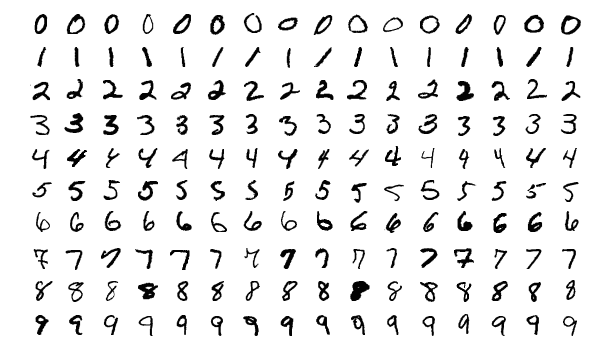
<center> <a href='http://yann.lecun.com/exdb/mnist/'> The MNIST Database Hompage </a></center>

### MNIST Data 설명
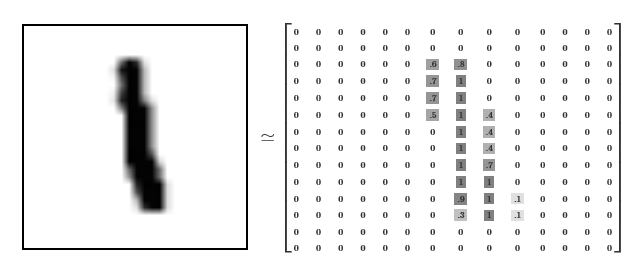
<center> <a href='http://colah.github.io/posts/2014-10-Visualizing-MNIST/'> http://colah.github.io/posts/2014-10-Visualizing-MNIST/ </a></center><br>

- 이미지 데이터는 픽셀로 이루어져 있으며, 각 픽셀의 밝기(intensity)를 통해 이미지를 나타낼 수 있다.
- MNIST 데이터는 이런 픽셀 값들을 설명변수(X)로 하여 어떤 숫자(Y)에 해당하는 이미지인지 분류하는 문제
- MNIST 데이터의 이미지는 가로 28 픽셀, 세로 28 픽셀로 이루어져 있으므로 28 x 28 = 784개의 설명변수로 10개의 클래스를 예측하는 다범주 분류문제

## 3. 데이터 전처리 및 탐색적 데이터 분석

### 데이터 불러오기

In [61]:
dat = pd.read_csv('./data/MNIST_Example.csv')

### 클래스 비율 확인

In [62]:
dat.groupby('Y')['Y'].count()

Y
0.0    100
1.0    100
2.0    100
3.0    100
4.0    100
5.0    100
6.0    100
7.0    100
8.0    100
9.0    100
Name: Y, dtype: int64

### 설명변수(X)와 반응변수(Y) 정의

In [63]:
x = dat.drop('Y', axis=1)
y = dat['Y']

In [64]:
print("x shape: ", x.shape)
x.head()

x shape:  (1000, 784)


,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 학습데이터 (Training Data) 및 테스트 데이터 (Testing Data) 나누기
- stratify=y :학습데이터와 검증데이터의 클래스 비율이 달라지지 않도록 stratify 옵션 사용

In [65]:
train_x, test_x, train_y, test_y = train_test_split(x, y, stratify=y, test_size=0.2)

### 학습데이터와 검증데이터에서의 클래스 비율 확인

Text(0.5, 1.0, 'Testing Data')

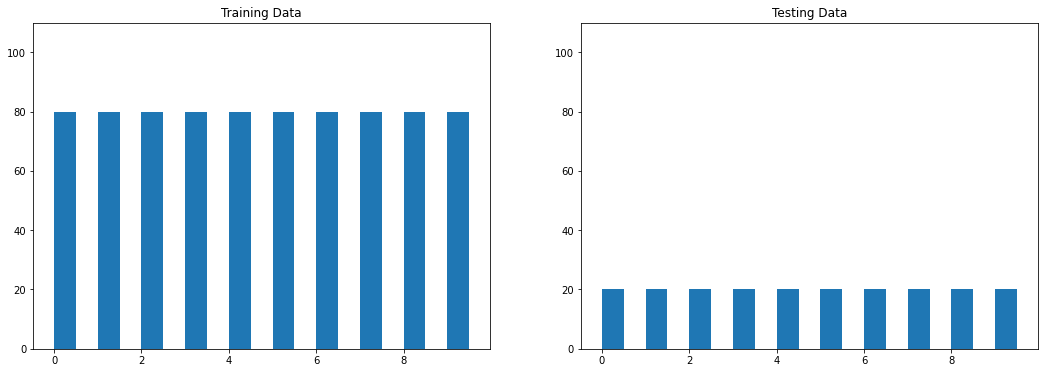

In [66]:
plt.figure(figsize=(18, 6))

plt.subplot(121)
plt.hist(train_y, bins=np.arange(0, 10, 0.5))
plt.ylim(0, 110)
plt.title('Training Data')

plt.subplot(122)
plt.hist(test_y, bins=np.arange(0, 10, 0.5))
plt.ylim(0, 110)
plt.title('Testing Data')

## 4. 모델링: Multilayer Perceptron (MLP) Classifier

<a href='http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html'> Scikit-Learn MLP Classifier Manual </a>

### MLP Classifier 정의
- activation: activation function 타입 (identity, logistic, tanh, relu)
- alpha: L2 regularization term parameter (과적합 방지용)
- batch_size: stochastic optimizer가 사용할 minibatch 크기
- max_iter: stochastic optimizer의 최대 iteration 횟수
- solver: stochastic optimizer 종류 (adam, sgd, lbfgs)

In [67]:
clf_mlp = MLPClassifier(activation='relu', alpha=1E-4, batch_size=100,
                        hidden_layer_sizes=(100), max_iter=500,
                        solver='adam', verbose=10)

### MLP Classifier 구조
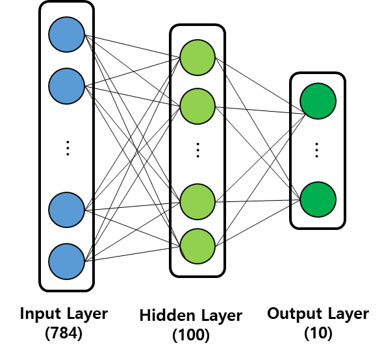

### MLP Classifier 학습

In [68]:
clf_mlp.fit(train_x, train_y)

Iteration 1, loss = 2.14331169
Iteration 2, loss = 1.52213178
Iteration 3, loss = 1.07974954
Iteration 4, loss = 0.80379897
Iteration 5, loss = 0.62912869
Iteration 6, loss = 0.51970571
Iteration 7, loss = 0.44390842
Iteration 8, loss = 0.38558689
Iteration 9, loss = 0.34543855
Iteration 10, loss = 0.31282262
Iteration 11, loss = 0.28049461
Iteration 12, loss = 0.25646365
Iteration 13, loss = 0.23556139
Iteration 14, loss = 0.21519126
Iteration 15, loss = 0.19914960
Iteration 16, loss = 0.18379904
Iteration 17, loss = 0.16842986
Iteration 18, loss = 0.15687686
Iteration 19, loss = 0.14494025
Iteration 20, loss = 0.13444429
Iteration 21, loss = 0.12489169
Iteration 22, loss = 0.11684697
Iteration 23, loss = 0.10910033
Iteration 24, loss = 0.10165294
Iteration 25, loss = 0.09535755
Iteration 26, loss = 0.08948458
Iteration 27, loss = 0.08369847
Iteration 28, loss = 0.07887932
Iteration 29, loss = 0.07421359
Iteration 30, loss = 0.06984085
Iteration 31, loss = 0.06615206
Iteration 32, los

MLPClassifier(batch_size=100, hidden_layer_sizes=100, max_iter=500, verbose=10)

## 5. Multilayer Perceptron 모델 성능 평가

### 학습된 MLP Classifier 결과 확인: Training Data Confusion Matrix

In [70]:
train_x.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
847,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
229,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


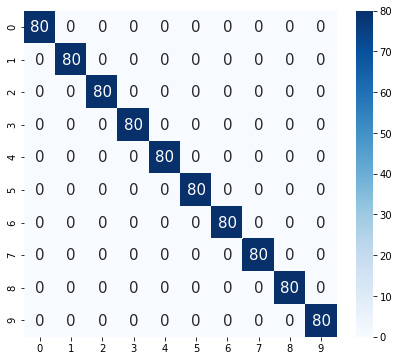

In [71]:
train_y_pred = clf_mlp.predict(train_x)
cm_train = confusion_matrix(train_y, train_y_pred)
cm_train = pd.DataFrame(cm_train, columns=np.arange(10), index=np.arange(10))
plt.figure(figsize=(7, 6))
sns.heatmap(data=cm_train, annot=True, fmt='d', annot_kws={'size': 15}, cmap='Blues')

### 학습된 MLP Classifier 성능 평가: Testing Data Confusion Matrix

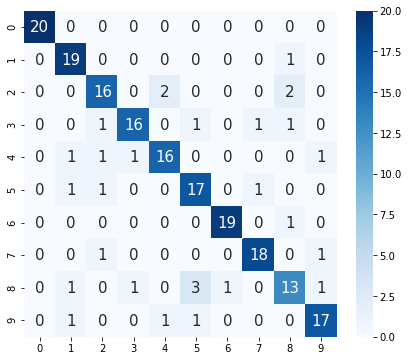

In [72]:
test_y_pred = clf_mlp.predict(test_x)
cm_test = confusion_matrix(test_y, test_y_pred)
cm_test = pd.DataFrame(cm_test, columns=np.arange(10), index=np.arange(10))
plt.figure(figsize=(7, 6))
sns.heatmap(data=cm_test, annot=True, fmt='d', annot_kws={'size': 15}, cmap='Blues')

# **인공신경망모델_회귀_1: 자동차 가격 예측**

## 1. 모듈 불러오기

In [73]:
''' 기본 모듈 및 시각화 모듈 '''
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


''' 데이터 전처리 모듈 '''
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

''' Neural Network Regressor 모듈 '''
from sklearn.neural_network import MLPRegressor

''' Linear Regression 모듈 '''
from sklearn.linear_model import LinearRegression

''' 결과 평가용 모듈 '''
from sklearn.metrics import  mean_squared_error, r2_score, mean_absolute_error

## 2. 분석 데이터셋: Toyota Corolla
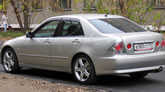
<center><a href='https://www.kaggle.com/klkwak/toyotacorollacsv'> https://www.kaggle.com/klkwak/toyotacorollacsv </a></center>

## 3. 데이터 전처리

### 데이터 불러오기

In [74]:
dat = pd.read_csv('./data/toyotacorolla.csv')

### 데이터 확인

In [75]:
dat.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


### 설명변수(X)와 반응변수(Y) 정의

In [76]:
x = dat.drop(['Id', 'Model', 'Price', 'Fuel_Type'], axis=1)
y = dat['Price']

### 범주형 설명변수에 대한 Dummy 변수 생성

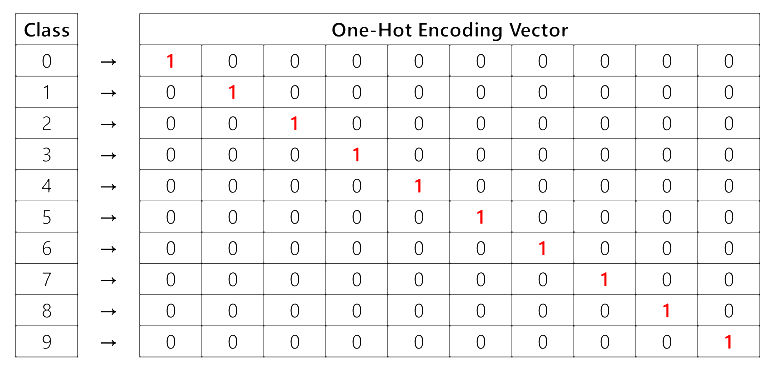



In [77]:
dat['Fuel_Type']

0       Diesel
1       Diesel
2       Diesel
3       Diesel
4       Diesel
         ...  
1431    Petrol
1432    Petrol
1433    Petrol
1434    Petrol
1435    Petrol
Name: Fuel_Type, Length: 1436, dtype: object

In [78]:
x_dummy = pd.get_dummies(dat['Fuel_Type'], drop_first=True)

In [79]:
x_dummied = pd.concat((x,x_dummy), axis=1)

### 학습데이터(Training Dataset)와 검증데이터(Testing Dataset) 분리

In [80]:
train_x, test_x, train_y, test_y = train_test_split(x_dummied, y, test_size=0.3)

### 설명변수(X) Scaling

In [81]:
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

## 4. Multilayer Perceptron 모델링

### Multilayer Perceptron (MLP) Regressor 정의
<a href='http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html'> Scikit-Learn MLP Regressor Manual </a>

<b>activation</b> - activation function 타입 (identity, logistic, tanh, <font color='red'>relu</font>) <br>
<b>alpha     </b> - L2 regularization term parameter (과적합 방지용) <br>
<b>batch_size</b> - stochastic optimizer가 사용할 minibatch 크기 <br>
<b>max_iter  </b> - stochastic optimizer의 최대 iteration 횟수<br>
<b>solver    </b> - stochastic optimizer 종류 (<font color='red'>adam</font>, sgd, lbfgs) <br>

In [82]:
reg_mlp = MLPRegressor(activation='relu', alpha=1E-3, batch_size=25,
                       hidden_layer_sizes=(50, 25), max_iter=1000, learning_rate_init=0.005,
                       solver='adam', verbose=10)

### MLP Regressor 구조
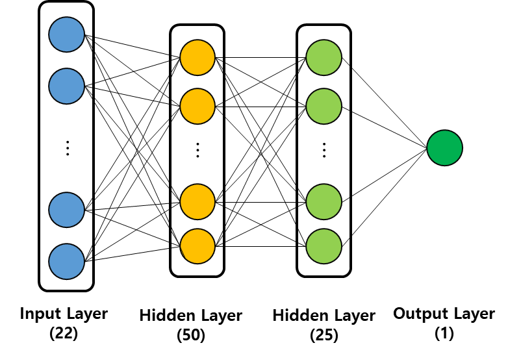

### MLP Regressor 학습

In [83]:
reg_mlp.fit(train_x, train_y)

Iteration 1, loss = 62789154.15718698
Iteration 2, loss = 60070365.96157306
Iteration 3, loss = 48276217.40272634
Iteration 4, loss = 27026941.61161222
Iteration 5, loss = 13057464.17113597
Iteration 6, loss = 6289358.01340507
Iteration 7, loss = 3021489.19465778
Iteration 8, loss = 2131705.79629012
Iteration 9, loss = 1769640.05476998
Iteration 10, loss = 1537365.79832951
Iteration 11, loss = 1369655.28022564
Iteration 12, loss = 1234297.78776551
Iteration 13, loss = 1131828.09719957
Iteration 14, loss = 1050610.04633424
Iteration 15, loss = 965269.77012356
Iteration 16, loss = 909467.32092388
Iteration 17, loss = 857892.49417032
Iteration 18, loss = 815934.57889398
Iteration 19, loss = 780060.47506346
Iteration 20, loss = 741640.56029805
Iteration 21, loss = 714922.28942058
Iteration 22, loss = 687474.18591358
Iteration 23, loss = 666491.03538826
Iteration 24, loss = 648656.20174072
Iteration 25, loss = 627918.57142482
Iteration 26, loss = 610387.22773765
Iteration 27, loss = 595231.

MLPRegressor(alpha=0.001, batch_size=25, hidden_layer_sizes=(50, 25),
             learning_rate_init=0.005, max_iter=1000, verbose=10)

## 5. Multilayer Perceptron 모델 성능 평가

In [85]:
train_y_pred = reg_mlp.predict(train_x)
test_y_pred = reg_mlp.predict(test_x)
print('MLP Regressor Performance')
print('Training MAE: {:.4f}'.format(mean_absolute_error(train_y, train_y_pred)))
print('Testing MAE:  {:.4f}'.format(mean_absolute_error(test_y, test_y_pred)))

MLP Regressor Performance
Training MAE: 483.9921
Testing MAE:  863.7143


## 6. Linear Regression 모델과 비교

In [86]:
lm = LinearRegression()
lm.fit(train_x, train_y)
print('Linear Regression Performance')
print('Training MAE: {:.4f}'.format(mean_absolute_error(train_y, lm.predict(train_x))))
print('Testing MAE:  {:.4f}'.format(mean_absolute_error(test_y, lm.predict(test_x))))

Linear Regression Performance
Training MAE: 807.4539
Testing MAE:  835.2402


# **인공신경망모델_회귀_2: 주택 가격 예측**

## 1. 모듈 불러오기

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

''' 데이터 전처리 모듈 '''
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

''' Neural Network Regressor 모듈 '''
from sklearn.neural_network import MLPRegressor

''' Linear Regression 모듈 '''
from sklearn.linear_model import LinearRegression

''' 결과 평가용 모듈 '''
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.datasets import load_boston

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

### 데이터 구조  
- 데이터: 1978년 보스턴 주택 가격  
- 관측치 개수: 506개
- 변수 개수: 설명변수 13개 / 반응변수 1개

### 설명 변수(원인: 예측값을 설명할 수 있는 변수)      
- CRIM: 범죄율  
- INDUS: 비소매상업지역 면적 비율  
- NOX: 일산화질소 농도  
- RM: 주택당 방 수  
- LSTAT: 인구 중 하위 계층 비율  
- B: 인구 중 흑인 비율  
- PTRATIO: 학생/교사 비율  
- ZN: 25,000 평방피트를 초과 거주지역 비율  
- CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0  
- AGE: 1940년 이전에 건축된 주택의 비율  
- RAD: 방사형 고속도로까지의 거리  
- DIS: 직업센터의 거리  
- TAX: 재산세율  

### 반응 변수(결과: 예측하고자 하는 값)
- MEDV: 주택가격

# Load Data

In [88]:
boston_dataset = load_boston()
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [89]:
# Description of the dataset
print(boston_dataset['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [90]:
boston = pd.DataFrame(boston_dataset['data'], columns=boston_dataset['feature_names'])  # pandas dataframe
boston['MEDV'] = boston_dataset['target']
print('Boston Housing dataset has {} samples, {} columns'.format(*boston.shape))

Boston Housing dataset has 506 samples, 14 columns


In [91]:
boston.head()
#boston.tail()
#boston.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Explore Data

C:\Users\seok\.conda\envs\hynix\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


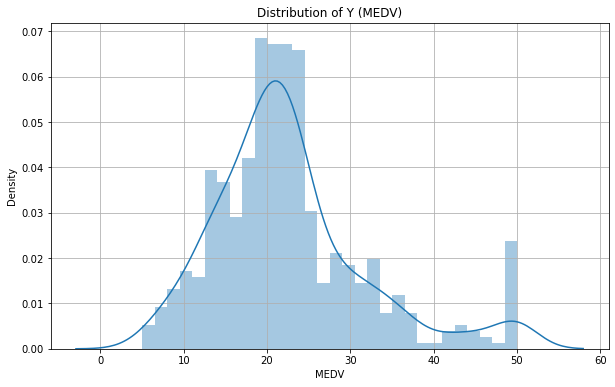

In [92]:
# Distribution of target (Y)
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.distplot(boston['MEDV'], bins=30, ax=ax)
ax.set_title('Distribution of Y (MEDV)')
plt.grid(True)
plt.show(fig)

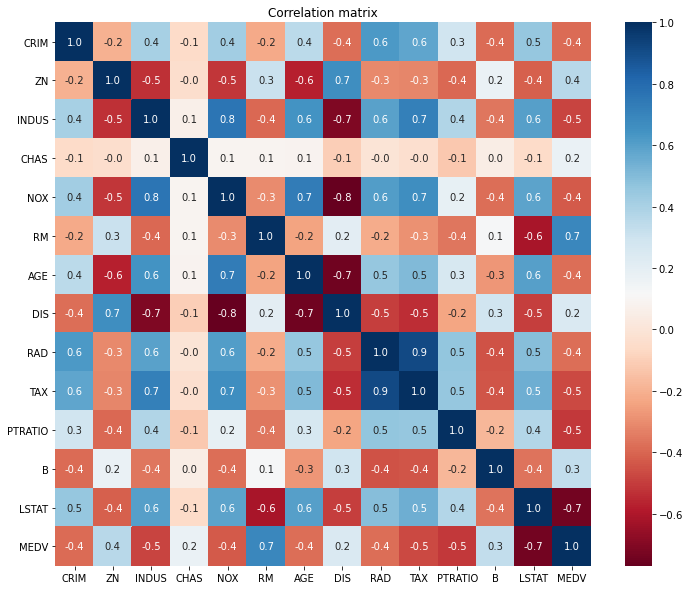

In [93]:
# Check correlation among features
corr_matrix = boston.corr()

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
sns.heatmap(data=corr_matrix, cmap=plt.cm.RdBu, annot=True, fmt='.1f', ax=ax)
ax.set_title('Correlation matrix')
plt.show(fig)

# Prepare Training & Test Data

## 3. 데이터 전처리

$\mathbf{X}$: 설명변수/입력변수 <br>
$\mathbf{y}$: 반응변수/출력변수

In [96]:
# pandas dataframe -> numpy array
X = boston.drop('MEDV', axis=1).values
y = boston['MEDV'].values

# Change dtype
X = X.astype(np.float32)
y = y.astype(np.float32).reshape(-1, 1)


print(X.size, X.dtype)
print(y.size, y.dtype)

6578 float32
506 float32


In [97]:
# Split into train & test sets
split_idx = 400
X_train, y_train = X[:split_idx], y[:split_idx]
X_test, y_test = X[split_idx:], y[split_idx:]

# Build & Train Model


In [98]:
reg_mlp = MLPRegressor(activation='relu', alpha=1E-3, batch_size=25,
                       hidden_layer_sizes=(50, 25), max_iter=1000, learning_rate_init=0.005,
                       solver='adam', verbose=10)

In [99]:
reg_mlp.fit(X_train, y_train)

C:\Users\seok\.conda\envs\hynix\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 1, loss = 234.64776487
Iteration 2, loss = 63.33199205
Iteration 3, loss = 34.90201551
Iteration 4, loss = 37.94480409
Iteration 5, loss = 31.95416512
Iteration 6, loss = 29.83727041
Iteration 7, loss = 33.80106741
Iteration 8, loss = 32.72241659
Iteration 9, loss = 29.21774451
Iteration 10, loss = 24.66273148
Iteration 11, loss = 26.39874160
Iteration 12, loss = 24.89151125
Iteration 13, loss = 23.71977287
Iteration 14, loss = 19.96428992
Iteration 15, loss = 17.11331767
Iteration 16, loss = 21.73908367
Iteration 17, loss = 17.57349414
Iteration 18, loss = 19.03304397
Iteration 19, loss = 18.18597241
Iteration 20, loss = 16.68946713
Iteration 21, loss = 15.35934160
Iteration 22, loss = 17.58519767
Iteration 23, loss = 14.65232902
Iteration 24, loss = 13.08738314
Iteration 25, loss = 13.65406931
Iteration 26, loss = 12.25626061
Iteration 27, loss = 12.30752629
Iteration 28, loss = 12.42481267
Iteration 29, loss = 16.12829207
Iteration 30, loss = 15.55827524
Iteration 31, loss

MLPRegressor(alpha=0.001, batch_size=25, hidden_layer_sizes=(50, 25),
             learning_rate_init=0.005, max_iter=1000, verbose=10)

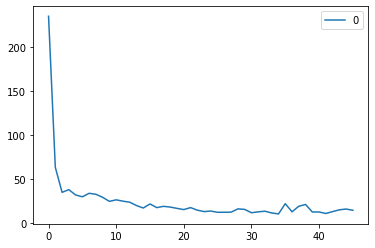

In [100]:
pd.DataFrame(reg_mlp.loss_curve_).plot()


In [101]:
train_y_pred = reg_mlp.predict(X_train)
test_y_pred = reg_mlp.predict(X_test)
print('MLP Regressor Performance')
print('Training MAE: {:.4f}'.format(mean_absolute_error(y_train, train_y_pred)))
print('Testing MAE:  {:.4f}'.format(mean_absolute_error(y_test, test_y_pred)))

MLP Regressor Performance
Training MAE: 3.0359
Testing MAE:  4.4373


## 6. 모델 해석
- R-squared (결정계수,coefficient of determination):모형의 성능
- coef (회귀계수): X가 한단위 증가할 때 Y의 변화량
- P>[t] (p-value):0.1 이하일 때 변수가 유의미

## 7. 실제값 vs. 모델 출력 값 비교


### 실제값 - 모델 출력 값 산점도를 통한 비교

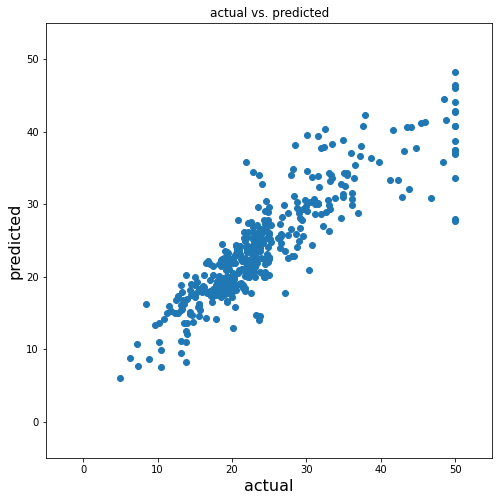

In [102]:
plt.figure(figsize=(8, 8))
plt.title('actual vs. predicted')
plt.scatter(y_train, train_y_pred)
plt.xlabel('actual', size=16)
plt.ylabel('predicted', size=16)
plt.xlim(-5, 55)
plt.ylim(-5, 55)
plt.show()

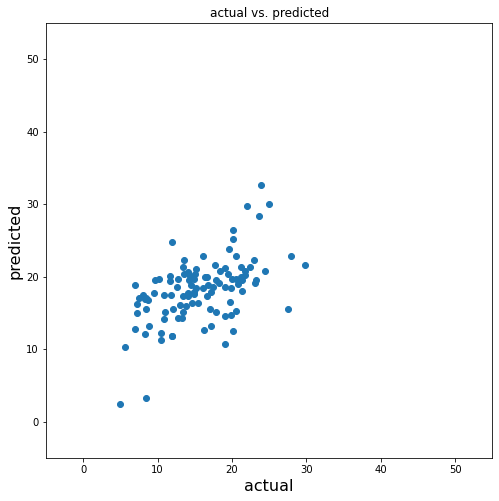

In [103]:
plt.figure(figsize=(8, 8))
plt.title('actual vs. predicted')
plt.scatter(y_test, test_y_pred)
plt.xlabel('actual', size=16)
plt.ylabel('predicted', size=16)
plt.xlim(-5, 55)
plt.ylim(-5, 55)
plt.show()

### 모델 출력 값 평가를 위한 지표들

In [104]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

###  Mean Squared Error (평균 제곱 오차): $\frac{1}{n} \sum_{i=1}^{n} (y_{i} - \hat{y}_{i})^{2}$   

In [105]:
print(mean_squared_error(y_test, test_y_pred))

28.580074851103703


###  Root Mean Squared Error (제곱근 평균 제곱 오차): $\sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_{i} - \hat{y}_{i})^{2}}$

In [106]:
print(np.sqrt(mean_squared_error(y_test, test_y_pred)))

5.346033562474491


### Mean Absolute Error (평균 절대 오차): $\frac{1}{n} \sum_{i=1}^{n} |y_{i} - \hat{y}_{i}|$


In [107]:
print(mean_absolute_error(y_test, test_y_pred))

4.437307344949394


###  Mean Absolute Percentage Error (평균 절대 백분율 오차): $\frac{1}{n}\sum_{i=1}^{n} \left|\frac{y_{i} - \hat{y}_{i}}{y_{i}} \right| \times 100\%$


In [108]:
print(mean_absolute_percentage_error(y_test, test_y_pred))

49.20201657555728
